In [5]:
import os
import sys
sys.path.append('../..')
from GKP_ampDamp import *
import numpy as np

In [6]:
Delta = 0.481
print('Delta =',Delta)
n_D = comp_n_Delta(Delta)
print('n_Delta =',n_D)
gamma_lst = np.linspace(0,0.1,11)
print('gamma list:',list(gamma_lst))


Delta = 0.481
n_Delta = 1.6995480836506558
gamma list: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


compute transpose infidelity directly

In [7]:

dimL=20
cutoff = 5
infid_M_lst = []
for gamma in gamma_lst:
    ElmuBasis = GKP_ElmuBasis(Delta = Delta, gamma = gamma, m_sum_cutoff=20,M_sum_cutoff=5,l_cut=20)
    # check
    if 1:
        ck = check_basis(ElmuBasis = ElmuBasis,nBasis = None)
        ck.trM()
    infid_M = ElmuBasis.transpose_infid_M()
    print(str(infid_M))
    infid_M_lst.append(infid_M)
print('infid_M_lst =',infid_M_lst)


tr(M)-2 = -2.220446049250313e-16
0.0
tr(M)-2 = -2.220446049250313e-16
0.0007032768163500736
tr(M)-2 = -2.220446049250313e-16
0.0015788792758927306
tr(M)-2 = -6.661338147750939e-16
0.00263862625512834
tr(M)-2 = 0.0
0.00389402609116829
tr(M)-2 = -4.440892098500626e-16
0.005356332498325123
tr(M)-2 = -2.220446049250313e-16
0.007036571652056511
tr(M)-2 = -6.661338147750939e-16
0.008945546653718384
tr(M)-2 = -8.881784197001252e-16
0.011093824705173283
tr(M)-2 = -6.661338147750939e-16
0.0134917114034796
tr(M)-2 = -8.881784197001252e-16
0.016149215699940767
infid_M_lst = [0.0, 0.0007032768163500736, 0.0015788792758927306, 0.00263862625512834, 0.00389402609116829, 0.005356332498325123, 0.007036571652056511, 0.008945546653718384, 0.011093824705173283, 0.0134917114034796, 0.016149215699940767]


SDP results

In [10]:
SDP_lst = []
for gamma in gamma_lst:
    n_cut = 40
    i_cut = 10
    eps = 1e-6
    nBasis = GKP_nBasis(Delta, gamma, n_cut, sum_cutoff = 5)
    res = 1-nBasis.SDP_optimize_Recovery_numberBasis(eps=eps)[0]
    SDP_lst.append(res)
    print(res)
print('SDP_lst =',SDP_lst)

-7.455298152159173e-07
0.0006850875097352827
0.0014938061324565322
0.0024470025832702413
0.0035470477659537147
0.004812086081860345
0.0062479639067928305
0.007864791809512939
0.009677617842346775
0.011689874010322954
0.013915096031704266
SDP_lst = [-7.455298152159173e-07, 0.0006850875097352827, 0.0014938061324565322, 0.0024470025832702413, 0.0035470477659537147, 0.004812086081860345, 0.0062479639067928305, 0.007864791809512939, 0.009677617842346775, 0.011689874010322954, 0.013915096031704266]


compute transpose infidelity according to 1st and 2nd approximation.

In [14]:
dimL=20
cutoff = 5
infid_approx_Ord1_lst = []
infid_approx_Ord2_lst = []
for gamma in gamma_lst:
    ElmuBasis = GKP_ElmuBasis(Delta = Delta, gamma = gamma, m_sum_cutoff=20,M_sum_cutoff=5,l_cut=20)
    # check
    if 0:
        ck = check_basis(ElmuBasis = ElmuBasis,nBasis = None)
        ck.trM()
    infid_approx_Ord1 = ElmuBasis.transpose_infid_approx(approxOrd=1)
    infid_approx_Ord1_lst.append(infid_approx_Ord1)
    infid_approx_Ord2 = ElmuBasis.transpose_infid_approx(approxOrd=2)
    infid_approx_Ord2_lst.append(infid_approx_Ord2)
    print(infid_approx_Ord1,infid_approx_Ord2)
print('infid_approx_Ord1_lst =',infid_approx_Ord1_lst)
print('infid_approx_Ord2_lst =',infid_approx_Ord2_lst)

0.001995347775538983 0.001995347775538983
0.0021124030862686104 0.002134554824820004
0.002230870656006856 0.0023253172414005895
0.00235053015274043 0.00257648292792944
0.0024711663055886493 0.002897297028487677
0.002592569629616953 0.003297371500504916
0.002714537036030113 0.0037866481764171145
0.0028368723365187493 0.004375357219741333
0.0029593866505033227 0.00507397274612072
0.003081898723858082 0.005893167200863891
0.003204235167434118 0.006843765879151765
infid_approx_Ord1_lst = [0.001995347775538983, 0.0021124030862686104, 0.002230870656006856, 0.00235053015274043, 0.0024711663055886493, 0.002592569629616953, 0.002714537036030113, 0.0028368723365187493, 0.0029593866505033227, 0.003081898723858082, 0.003204235167434118]
infid_approx_Ord2_lst = [0.001995347775538983, 0.002134554824820004, 0.0023253172414005895, 0.00257648292792944, 0.002897297028487677, 0.003297371500504916, 0.0037866481764171145, 0.004375357219741333, 0.00507397274612072, 0.005893167200863891, 0.006843765879151765

plot

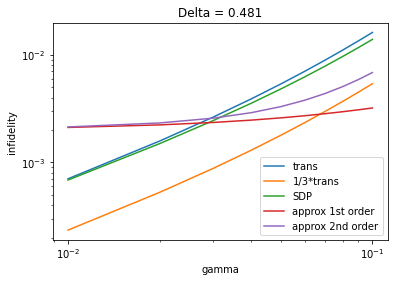

In [16]:
import matplotlib.pyplot as plt
import numpy as np
gamma_lst = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
infid_M_lst = np.array([0.0, 0.0007032768163500736, 0.0015788792758927306, 0.00263862625512834, 0.00389402609116829, 0.005356332498325123, 0.007036571652056511, 0.008945546653718384, 0.011093824705173283, 0.0134917114034796, 0.016149215699940767])
infid_approx_Ord1_lst = np.array([0.001995347775538983, 0.0021124030862686104, 0.002230870656006856, 0.00235053015274043, 0.0024711663055886493, 0.002592569629616953, 0.002714537036030113, 0.0028368723365187493, 0.0029593866505033227, 0.003081898723858082, 0.003204235167434118])
infid_approx_Ord2_lst = np.array([0.001995347775538983, 0.002134554824820004, 0.0023253172414005895, 0.00257648292792944, 0.002897297028487677, 0.003297371500504916, 0.0037866481764171145, 0.004375357219741333, 0.00507397274612072, 0.005893167200863891, 0.006843765879151765])
SDP_lst =[-7.455298152159173e-07, 0.0006850875097352827, 0.0014938061324565322, 0.0024470025832702413, 0.0035470477659537147, 0.004812086081860345, 0.0062479639067928305, 0.007864791809512939, 0.009677617842346775, 0.011689874010322954, 0.013915096031704266]
gamma = gamma_lst[1:]
SDP = SDP_lst[1:]
trans = infid_M_lst[1:]
trans_1st = infid_approx_Ord1_lst[1:]
trans_2st = infid_approx_Ord2_lst[1:]

plt.plot(gamma, trans,label="trans")
plt.plot(gamma, trans/3,label="1/3*trans")
plt.plot(gamma, SDP,label="SDP")
plt.plot(gamma, trans_1st,label="approx 1st order")
plt.plot(gamma, trans_2st,label="approx 2nd order")

plt.xlabel('gamma')
plt.ylabel('infidelity')
plt.title('Delta = 0.481')
plt.legend(loc = 'lower right')
plt.yscale('log')
plt.xscale('log')
plt.show()